In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display  # Allows the use of display() for DataFrames

import visuals as vs

# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv('census.csv')

display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [2]:
n_records = len(data.index)  # Total number of records

n_greater_50k = len(data[data['income'] == '>50K'].index) # Number of records where individual's income is more than $50,000

n_at_most_50k = len(data[data['income'] == '<=50K'].index) # Number of records where individual's income is at most $50,000

greater_percent = float(n_greater_50k)/float(n_records)*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


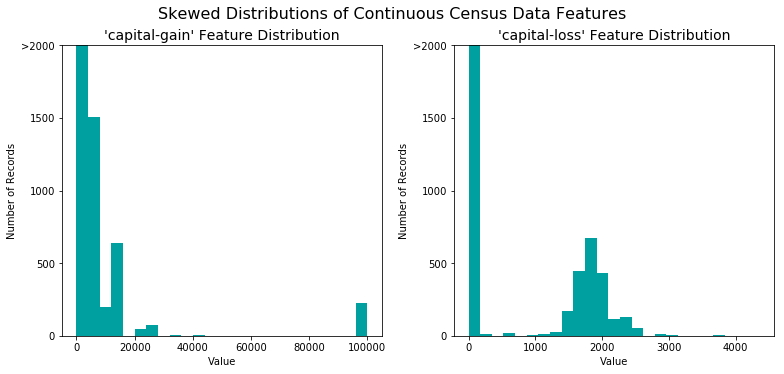

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

vs.distribution(data) # Visualize skewed continuous features of original data

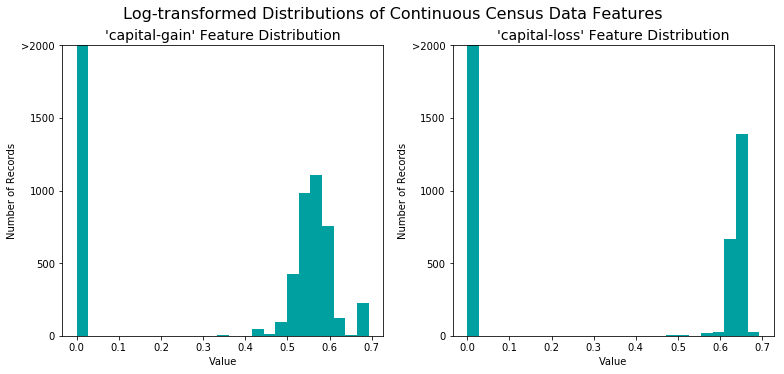

In [18]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']

features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x +1))


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default = (0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n=7))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.73768,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.00000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.00000,0.0,0.153061,Jamaica


In [20]:
features_final = pd.get_dummies(features_log_minmax_transform) # One-hot encode

income = data['income'].map({'<=50K':0, '>50K':1})

encoded = list(features_final.columns)
print('{} Total feature after one-hot encoding.'.format(len(encoded)))



103 Total feature after one-hot encoding.


In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print('Training test has {} samples'.format(X_train.shape[0]))
print('Testing set has {} samples'.format(X_test.shape[0]))

((36177, 103), (36177L,), (9045, 103), (9045L,))
Training test has 36177 samples
Testing set has 9045 samples


In [23]:
'''--------------------------------------
  |        | pred- >50K  |  pred- <=50K |
  |  >50K  | TP          |  FN          |
  | <=50K  | FP          |  TN          |
   --------------------------------------
'''

TP = np.sum(income) 

FP = income.count() - TP

TN = 0
FN = 0

accuracy = 1.0*(TP+TN)/income.count()  # <============

precision =  1.0*TP/(TP+FP) # true_positives/(true_positives+false_positives)
recall = 1.0*TP/(TP+FN) # true_positives/(true_positives+false_positives)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

print(TP+TN/income.count())  #<=========== 
print(accuracy)  # <============
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)) # <============= 

11208
0.247843969749
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [24]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    results['train_time'] = end - start
    
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train) 
    
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results
    
    

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


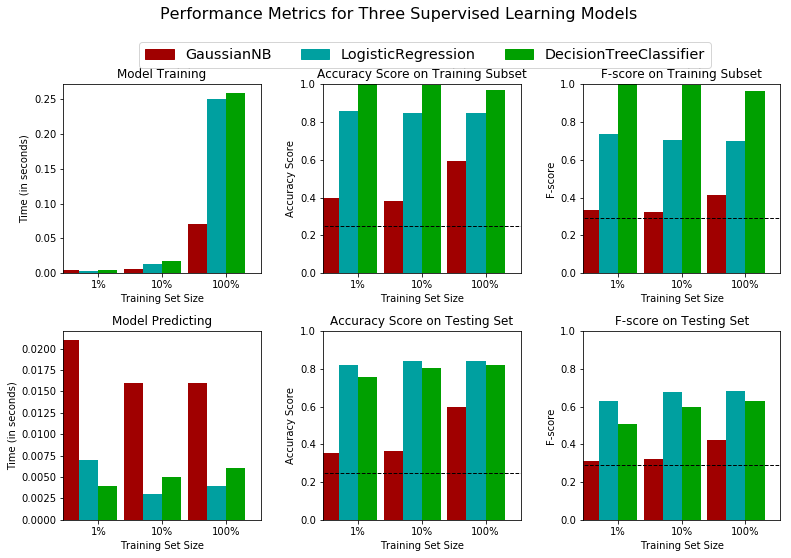

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression

clf_A = GaussianNB()
clf_B = tree.DecisionTreeClassifier(random_state = 9)
clf_C = LogisticRegression(random_state = 9)

# samples_100 = len(y_train)
# samples_10 = int(samples_100*0.1)
# samples_1 = int(samples_100*0.01)

samples_1 = int(len(y_train)/100)
samples_10 = int((len(y_train) * 10)/100)
samples_100 = len(y_train)

results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
         
vs.evaluate(results, accuracy, fscore)